<a href="https://colab.research.google.com/github/jotagectti/Data-Mining-Machine-Learning-y-Deep-Learning/blob/main/Resoluci%C3%B3n_ejercicio_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1.**Preparacion de Datos**

In [ ]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [ ]:
#from -> https://archive.ics.uci.edu/ml/datasets/student+performance
#cargar el data set
path = "student-mat.csv"
dataset_mat = pd.read_csv(path,sep=";")

#visualizar
dataset_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
dataset_mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

##1.**EDA(univariante)**

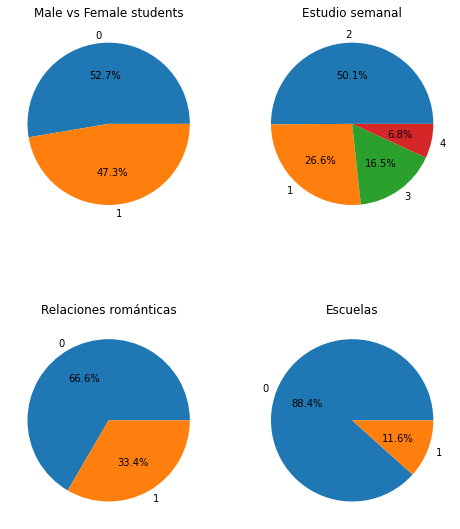

In [ ]:
# Pie charts
f, ax = plt.subplots(figsize=(8,10))

# Genero
plt.subplot(2,2,1)
plt.title("Male vs Female students")
sums = dataset_mat["sex"].value_counts()
labels = dataset_mat["sex"].unique()
plt.pie(sums, labels=labels,autopct='%1.1f%%')

# Weekly study time
plt.subplot(2, 2, 2)
plt.title("Estudio semanal")
df_sums = dataset_mat["studytime"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Romantic relationship
plt.subplot(2, 2, 3)
plt.title("Relaciones románticas")
df_sums = dataset_mat["romantic"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')

# Escuela
plt.subplot(2, 2, 4)
plt.title("Escuelas")
df_sums = dataset_mat["school"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
plt.show()

plt.show()

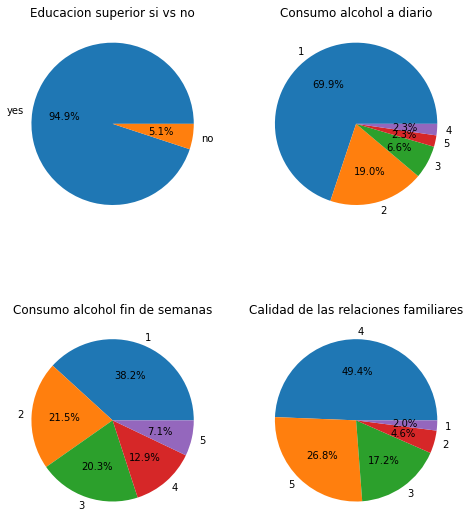

In [ ]:
# Pie charts
f, ax = plt.subplots(figsize=(8, 10))
# Educacion superior
plt.subplot(2, 2, 1)
plt.title("Educacion superior si vs no")
df_sums = dataset_mat["higher"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
# Consumo alcohol a diario
plt.subplot(2, 2, 2)
plt.title("Consumo alcohol a diario")
df_sums = dataset_mat["Dalc"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
# Consumo alcohol fin de semanas
plt.subplot(2, 2, 3)
plt.title("Consumo alcohol fin de semanas")
df_sums = dataset_mat["Walc"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
# Calidad relaciones familiares
plt.subplot(2, 2, 4)
plt.title("Calidad de las relaciones familiares")
df_sums = dataset_mat["famrel"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
plt.show()

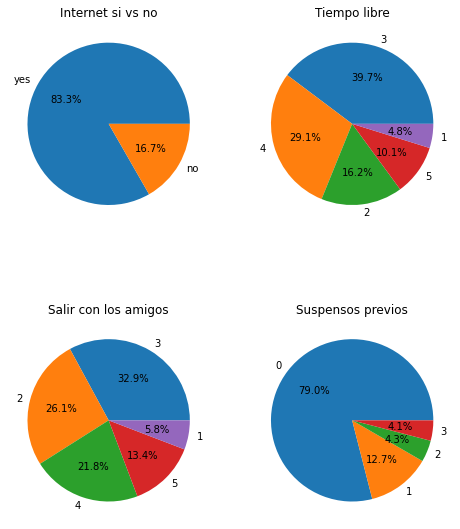

In [ ]:
# Pie charts
f, ax = plt.subplots(figsize=(8, 10))
# Educacion superior
plt.subplot(2, 2, 1)
plt.title("Internet si vs no")
df_sums = dataset_mat["internet"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
# Consumo alcohol a diario
plt.subplot(2, 2, 2)
plt.title("Tiempo libre")
df_sums = dataset_mat["freetime"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
# Consumo alcohol fin de semanas
plt.subplot(2, 2, 3)
plt.title("Salir con los amigos")
df_sums = dataset_mat["goout"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
# Calidad relaciones familiares
plt.subplot(2, 2, 4)
plt.title("Suspensos previos")
df_sums = dataset_mat["failures"].value_counts()
sums = list(df_sums.values)
labels = list(df_sums.index)
plt.pie(sums, labels=labels, autopct='%1.1f%%')
plt.show()

In [ ]:
list_binary = ['sex','school','address', 'Pstatus','famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic']
list_multi_not_ord = ['Mjob','Fjob','reason','guardian']
list_cat_not_ord = list_binary + list_multi_not_ord

In [ ]:
#pasar a codificacion numerica

dataset_mat.info()
#variables no tienen son las string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
#ncoding numerico de las variables
obj_df = dataset_mat.select_dtypes(include=['object']).copy()
#print(obj_df)
#

from sklearn.preprocessing import LabelEncoder
lb_encoder =  LabelEncoder()

for col in obj_df.columns:
  dataset_mat[col]=lb_encoder.fit_transform(dataset_mat[col])

dataset_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [ ]:
dataset_mat.isnull().sum()
#check valor nulo

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

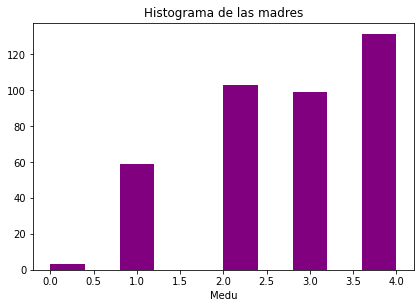

In [ ]:
# Histogramas
# tamano de representaciones
#f, ax = plt.figure(figsize(15,10))
plt.figure(figsize=(15,10))
# Histograma educacion de madres
plt.subplot(2,2,1)
plt.hist(dataset_mat['Medu'], color='purple')
plt.title("Histograma de las madres")
plt.xlabel("Medu")

plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


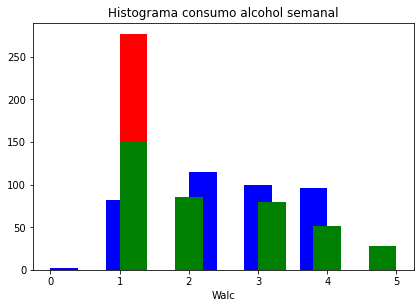

In [ ]:
#Otros histogramas
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 2)
plt.hist(dataset_mat['Fedu'], color = 'blue')
plt.title('Histograma sobre la educacion de los padres')
plt.xlabel('Fedu')
# Histograma Walc/Dalc
plt.subplot(2, 2, 2)
plt.hist(dataset_mat['Dalc'], color = 'red')
plt.title('Histograma consumo alcohol diario')
plt.xlabel('Dalc')
plt.subplot(2, 2, 2)
plt.hist(dataset_mat['Walc'], color = 'green')
plt.title('Histograma consumo alcohol semanal')
plt.xlabel('Walc')
plt.show()

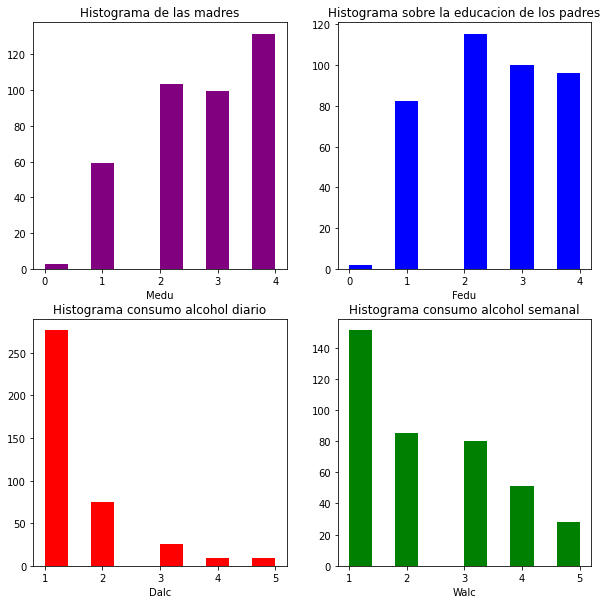

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.hist(dataset_mat['Medu'], color='purple')
plt.title("Histograma de las madres")
plt.xlabel("Medu")
plt.subplot(2,2,2)
plt.hist(dataset_mat['Fedu'], color = 'blue')
plt.title('Histograma sobre la educacion de los padres')
plt.xlabel('Fedu')
plt.subplot(2,2,3)
plt.hist(dataset_mat['Dalc'], color = 'red')
plt.title('Histograma consumo alcohol diario')
plt.xlabel('Dalc')
plt.subplot(2,2,4)
plt.hist(dataset_mat['Walc'], color = 'green')
plt.title('Histograma consumo alcohol semanal')
plt.xlabel('Walc')
plt.show()

Text(0.5, 0, 'G3')

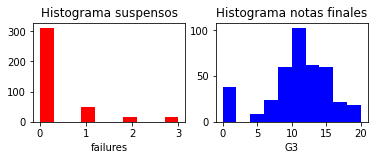

In [ ]:
# Histograma G3/failures
plt.subplot(2, 2, 1)
plt.hist(dataset_mat['failures'], color = 'red')
plt.title('Histograma suspensos')
plt.xlabel('failures')
plt.subplot(2, 2, 2)
plt.hist(dataset_mat['G3'], color = 'blue')
plt.title('Histograma notas finales')
plt.xlabel('G3')

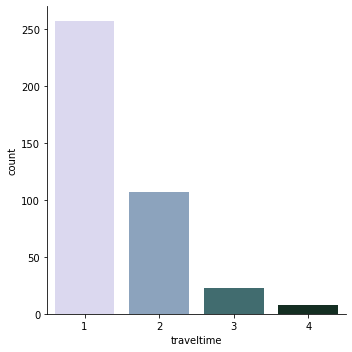

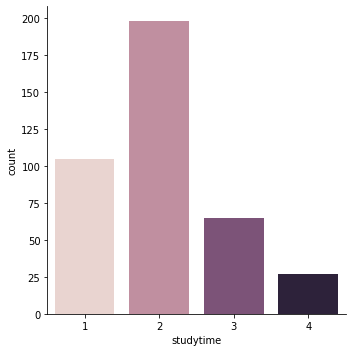

In [ ]:
# Histogramas con seaborn
sns.catplot(x="traveltime",kind="count",palette="ch:29", data=dataset_mat)
;
sns.catplot(x="studytime", kind="count", palette="ch:33", data=dataset_mat);


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py

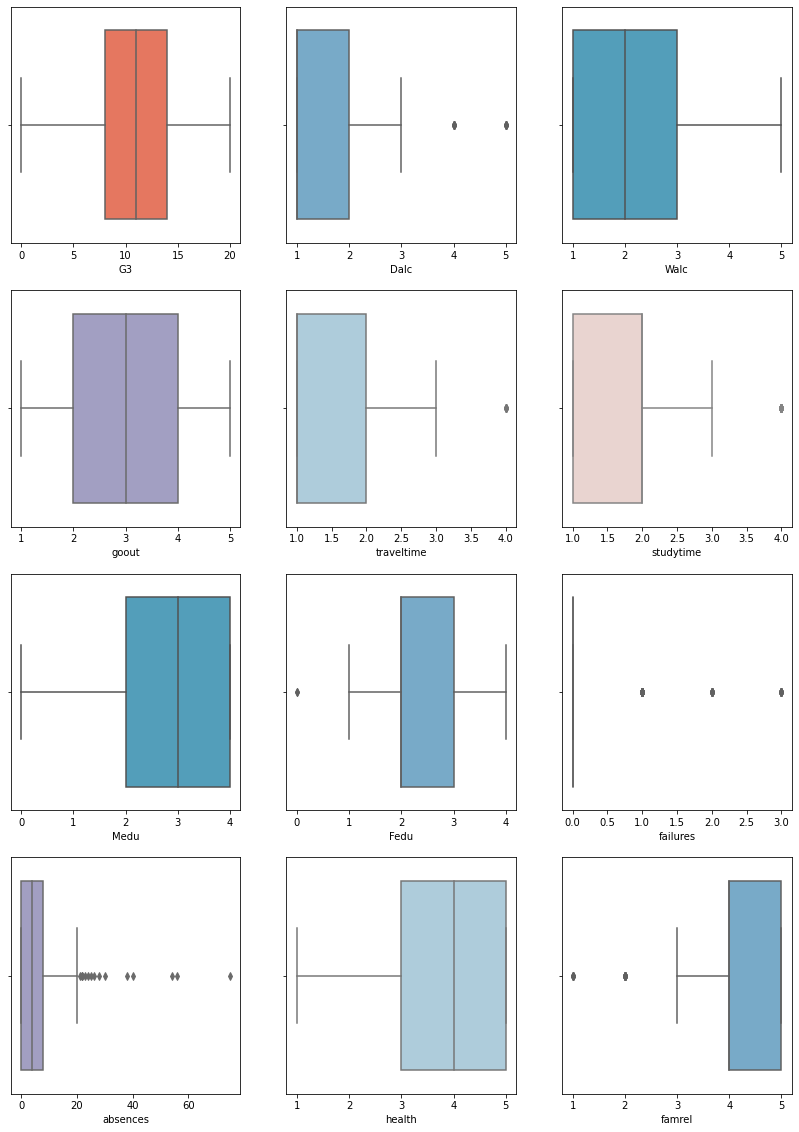

In [ ]:
#boxplots
f, ax = plt.subplots(4,3,figsize=(14,20))
sns.boxplot(x= "G3", data=dataset_mat, orient='v' , ax=ax[0][0], palette="Reds")
sns.boxplot(x= "Dalc", data=dataset_mat, orient='v' , ax=ax[0][1], palette="Blues")
sns.boxplot(x= "Walc", data=dataset_mat, orient='v' , ax=ax[0][2], palette="GnBu_d")
sns.boxplot(x= "goout", data=dataset_mat, orient='v' , ax=ax[1][0], palette="Purples")
sns.boxplot(x= "traveltime", data=dataset_mat, orient='v' , ax=ax[1][1], palette="Paired")
sns.boxplot(x= "studytime", data=dataset_mat, orient='v' , ax=ax[1][2], palette=sns.cubehelix_palette(8))
sns.boxplot(x= "Medu", data=dataset_mat, orient='v' , ax=ax[2][0], palette="GnBu_d")
sns.boxplot(x= "Fedu", data=dataset_mat, orient='v' , ax=ax[2][1], palette="Blues")
sns.boxplot(x= "failures", data=dataset_mat, orient='v' , ax=ax[2][2], palette="Reds")
sns.boxplot(x= "absences", data=dataset_mat, orient='v' , ax=ax[3][0], palette="Purples")
sns.boxplot(x= "health", data=dataset_mat, orient='v' , ax=ax[3][1], palette="Paired")
sns.boxplot(x= "famrel", data=dataset_mat, orient='v' , ax=ax[3][2], palette="Blues")

##1.**EDA(univariante)**

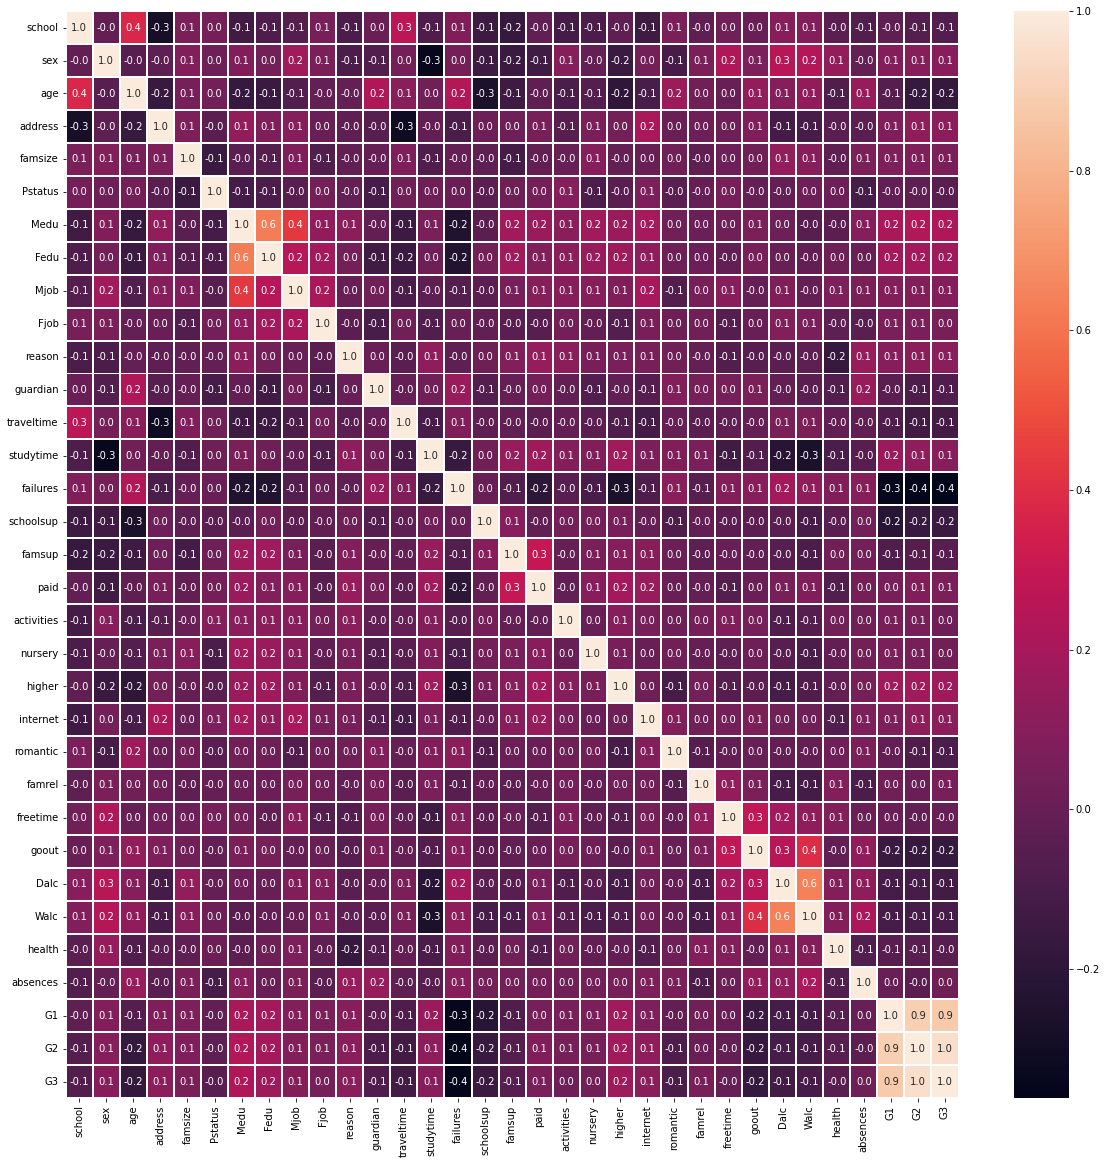

In [ ]:
#correlacion
f, ax = plt.subplots(figsize=(20,20))


sns.heatmap(dataset_mat.corr(method=("spearman")), annot=True, fmt=".1f", linewidths=1, ax=ax)
plt.show()

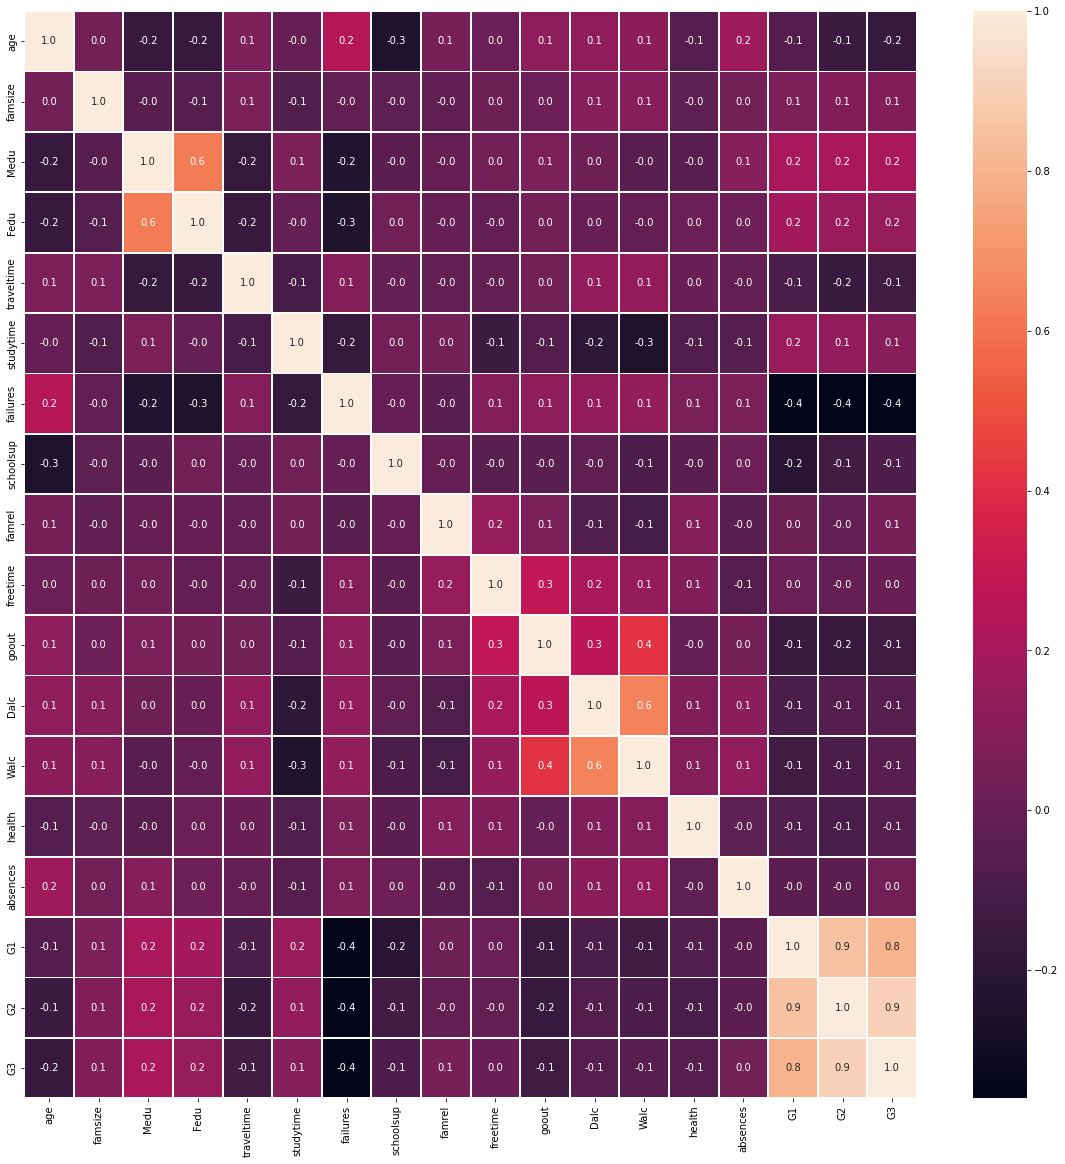

In [ ]:
list_cat_corrs = [x for x in list(dataset_mat) if x not in list_cat_not_ord]
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(dataset_mat[list_cat_corrs].corr(method='pearson'),annot=True,fmt=".1f",linewidths=1,ax=ax)
plt.show()

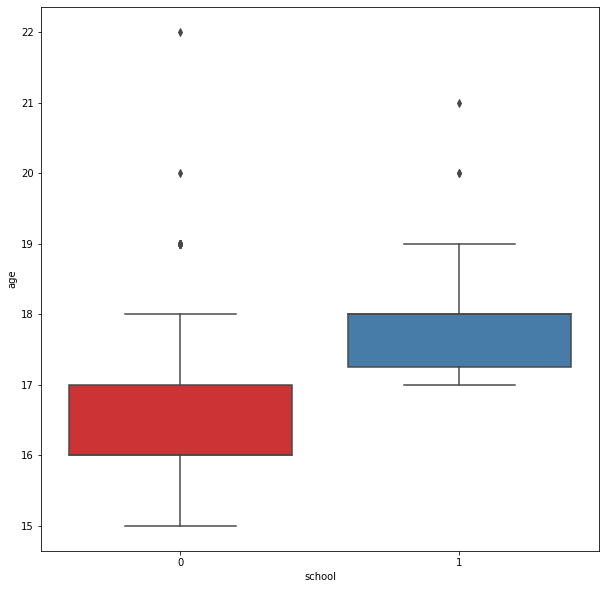

In [ ]:
#source for biserial -> https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pointbiserialr.html
#-> correlacion de variables categoricas NO ordinales

#variables categoricas no ordinales
#varible de Jaccard(index)
#pandas, calculate cramers coefficient matrix
#-> correlacion de variables BINARIAS

#Boxplot segun categorias
plt.figure(figsize=(10,10))
sns.boxplot(x="school",y="age", data=dataset_mat, palette="Set1")
plt.show()

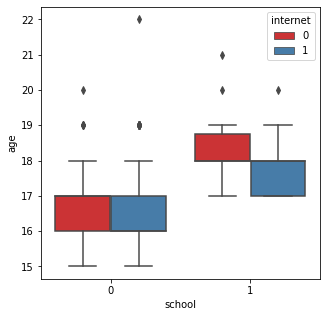

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(x="school",y="age", hue="internet", data=dataset_mat, palette="Set1")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


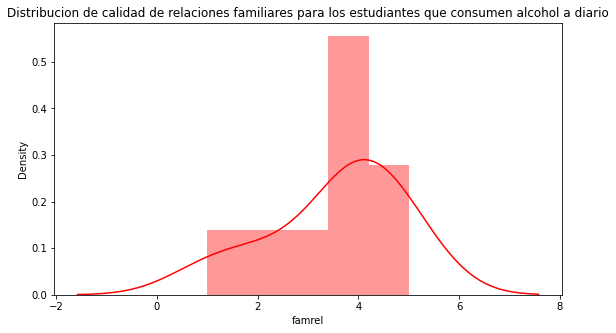

In [ ]:
#Histogram
f = plt.figure(figsize=(20,5))
ax = f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["famrel"],color='red',ax=ax)

plt.title("Distribucion de calidad de relaciones familiares para los estudiantes que consumen alcohol a diario")
plt.show()

In [90]:
#ANOVA (variables binarias)
print("influencias de escuela en notas")
print(stats.f_oneway(dataset_mat[dataset_mat['school']==0]['G3'],
                     dataset_mat[dataset_mat['school']==1]['G3']))
print()
#en este caso pvalue < 0.5(o bajo de 0.05) entonces no podriamos concluir ni dar razon al valor por correlacion

influencias de escuela en notas
F_onewayResult(statistic=0.7980416422082741, pvalue=0.3722262371311368)



In [91]:
print("Influencia del sexo en las notas")
print(stats.f_oneway(dataset_mat[dataset_mat["sex"]==0]["G3"],
 dataset_mat[dataset_mat["sex"]==1]["G3"]))
print()
print("Influencia de tener internet notas")
print(stats.f_oneway(dataset_mat[dataset_mat["internet"]==0]["G3"],
 dataset_mat[dataset_mat["internet"]==1]["G3"]))
print()
print("Influencia de tener relaciones románticas")
print(stats.f_oneway(dataset_mat[dataset_mat["romantic"]==0]["G3"],
 dataset_mat[dataset_mat["romantic"]==1]["G3"]))
print()
print("Influencia de tener clases extraescolares")
print(stats.f_oneway(dataset_mat[dataset_mat["paid"]==0]["G3"],
 dataset_mat[dataset_mat["paid"]==1]["G3"]))
print()
print("Influencia de tener actividades extraescolares")
print(stats.f_oneway(dataset_mat[dataset_mat["activities"]==0]["G3"],
 dataset_mat[dataset_mat["activities"]==1]["G3"]))
print()
print("Influencia del apoyo familiar al estudio")
print(stats.f_oneway(dataset_mat[dataset_mat["famsup"]==0]["G3"],
 dataset_mat[dataset_mat["famsup"]==1]["G3"]))
print()
print("Influencia de querer continuar con educacion superior")
print(stats.f_oneway(dataset_mat[dataset_mat["higher"]==0]["G3"],
 dataset_mat[dataset_mat["higher"]==1]["G3"]))
print()
print("Influencia de la escuela")
print(stats.f_oneway(dataset_mat[dataset_mat["school"]==0]["G3"],
dataset_mat[dataset_mat["school"]==1]["G3"]))
print()
print("Influencia de la escuela de enfermería")
print(stats.f_oneway(dataset_mat[dataset_mat["nursery"]==0]["G3"],
 dataset_mat[dataset_mat["nursery"]==1]["G3"]))
print()
print("Influencia de la ubicación de la vivienda")
print(stats.f_oneway(dataset_mat[dataset_mat["address"]==0]["G3"],
 dataset_mat[dataset_mat["address"]==1]["G3"]))
print()
print("Influencia de si viven los padres o no juntos")
print(stats.f_oneway(dataset_mat[dataset_mat["Pstatus"]==0]["G3"],
 dataset_mat[dataset_mat["Pstatus"]==1]["G3"]))
print()
print("Influencia del tamaño de la familia")
print(stats.f_oneway(dataset_mat[dataset_mat["famsize"]==0]["G3"],
 dataset_mat[dataset_mat["famsize"]==1]["G3"]))
print()

Influencia del sexo en las notas
F_onewayResult(statistic=4.251814371189991, pvalue=0.039865332341527955)

Influencia de tener internet notas
F_onewayResult(statistic=3.8490285747156046, pvalue=0.05048021213717589)

Influencia de tener relaciones románticas
F_onewayResult(statistic=6.752697701286662, pvalue=0.009712726394119712)

Influencia de tener clases extraescolares
F_onewayResult(statistic=4.13145106484603, pvalue=0.0427650640335768)

Influencia de tener actividades extraescolares
F_onewayResult(statistic=0.10189216053999332, pvalue=0.7497402737748178)

Influencia del apoyo familiar al estudio
F_onewayResult(statistic=0.6035051787521449, pvalue=0.43771108589488095)

Influencia de querer continuar con educacion superior
F_onewayResult(statistic=13.534903449348775, pvalue=0.0002668001587281827)

Influencia de la escuela
F_onewayResult(statistic=0.7980416422082741, pvalue=0.3722262371311368)

Influencia de la escuela de enfermería
F_onewayResult(statistic=1.0478711726566379, pvalue=

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


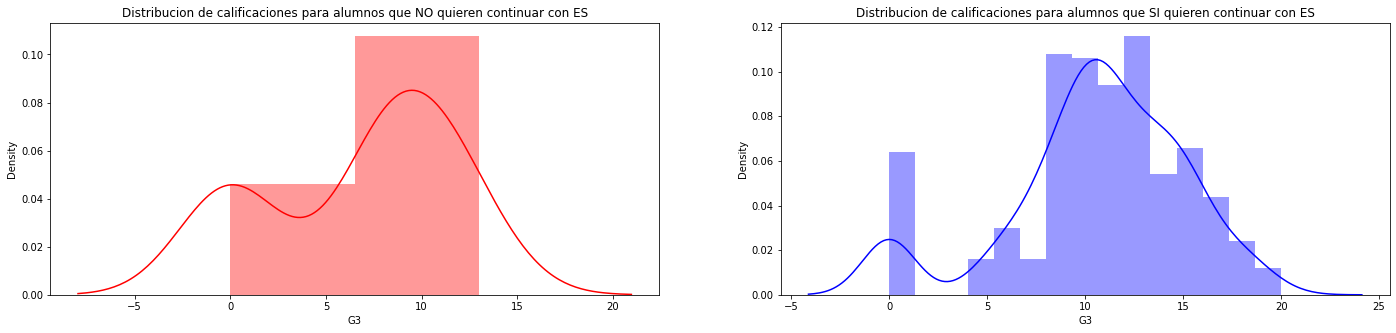

In [97]:
#Influencia de querer continuar con educacion superior
f= plt.figure(figsize=(24,5))
ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["higher"] == 0]['G3'],color='red',ax=ax)
ax.set_title('Distribucion de calificaciones para alumnos que NO quieren continuar con ES')
ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["higher"] == 1]['G3'],color='blue',ax=ax)
ax.set_title('Distribucion de calificaciones para alumnos que SI quieren continuar con ES')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


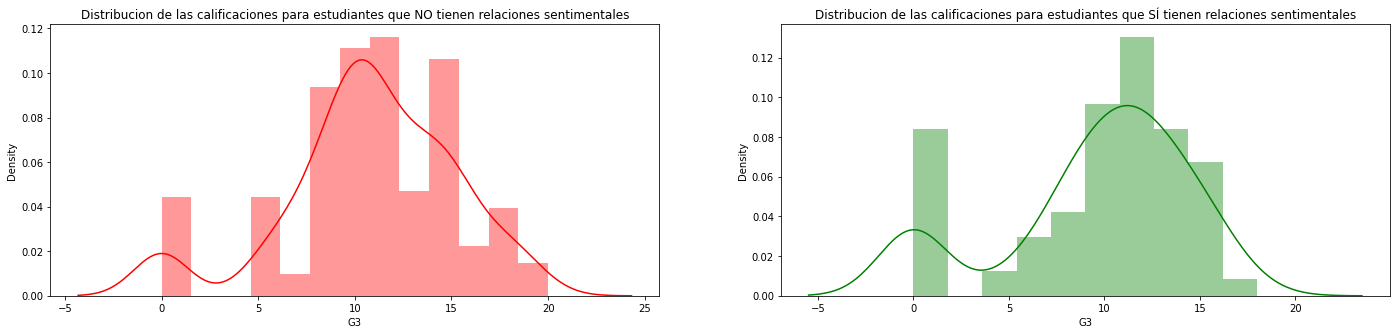

In [99]:
f= plt.figure(figsize=(24,5))
ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["romantic"] == 0]["G3"],color='red',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes que NO tienen relaciones sentimentales')
ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["romantic"] == 1]['G3'],color='green',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes que SÍ tienen relaciones sentimentales')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


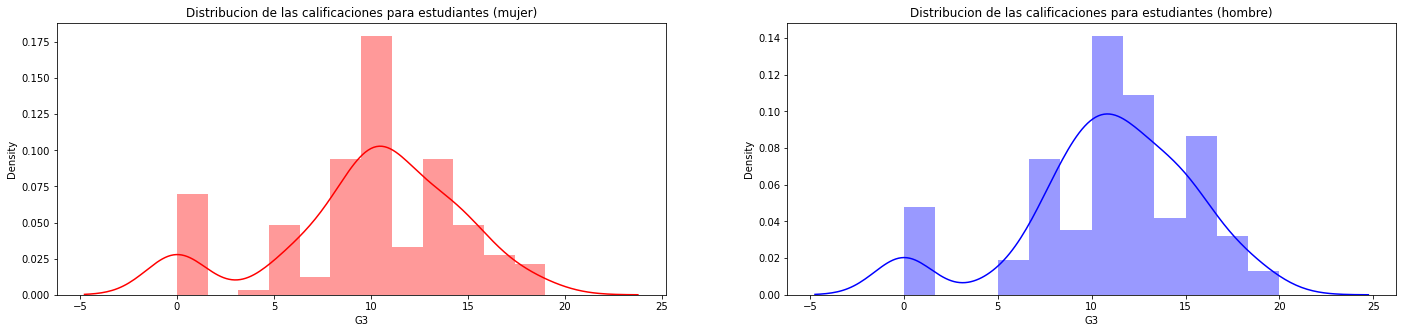

In [100]:
f= plt.figure(figsize=(24,5))
ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["sex"] == 0]["G3"],color='red',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes (mujer)')
ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["sex"] == 1]['G3'],color='blue',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes (hombre)')
plt.show()


In [101]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi

In [103]:
# mjob fjob reason guardian

#influencia trabajo madres en notas
x= dataset_mat['Mjob']
y= dataset_mat['G3']

mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia trabajo madres en notas")
print(Results)

Influencia trabajo madres en notas
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   2.9945 0.0189   0.328  5.661   True
     0      2   0.6702 0.8623   -1.25 2.5903  False
     0      3   1.8669 0.0862 -0.1551 3.8888  False
     0      4   1.8992 0.1559 -0.3907 4.1891  False
     1      2  -2.3244  0.057 -4.6905 0.0417  False
     1      3  -1.1276 0.6895 -3.5771 1.3218  False
     1      4  -1.0953 0.7685 -3.7702 1.5795  False
     2      3   1.1967 0.2474 -0.4085 2.8019  False
     2      4    1.229   0.41 -0.7028 3.1608  False
     3      4   0.0323    0.9 -2.0007 2.0653  False
---------------------------------------------------


In [104]:
# Influencia de la profesión del padre en las notas
x = dataset_mat["Fjob"]
y = dataset_mat["G3"]
mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de la profesión del padre en las notas")
print(Results)


Influencia de la profesión del padre en las notas
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   1.4611 0.8472  -2.612 5.5342  False
     0      2   0.0435    0.9 -2.8861 2.9732  False
     0      3   0.1473    0.9 -2.8981 3.1927  False
     0      4   1.8155 0.6308 -1.8284 5.4594  False
     1      2  -1.4176 0.6886 -4.4926 1.6575  False
     1      3  -1.3138 0.7639 -4.4993 1.8717  False
     1      4   0.3544    0.9 -3.4074 4.1162  False
     2      3   0.1037    0.9 -1.3592 1.5667  False
     2      4    1.772 0.2882 -0.7067 4.2507  False
     3      4   1.6682 0.4069 -0.9463 4.2827  False
---------------------------------------------------


In [105]:
# Influencia del tutor legal en las notas
x = dataset_mat["guardian"]
y = dataset_mat["G3"]
mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del tutor legal en las notas")
print(Results)

Influencia del tutor legal en las notas
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.2054    0.9 -1.5136 1.1028  False
     0      2  -1.6264 0.1964 -3.8416 0.5888  False
     1      2   -1.421 0.2213 -3.4321   0.59  False
---------------------------------------------------


In [107]:
# Influencia de la profesión de la madre en el consumo de alcohol diario
x = dataset_mat["Mjob"]
y = dataset_mat["Dalc"]
mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de la profesión de la madre el consumo de alcohol diario")
print(Results)

Influencia de la profesión de la madre el consumo de alcohol diario
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.1251    0.9 -0.6511 0.4008  False
     0      2   0.1137    0.9  -0.265 0.4925  False
     0      3   0.1344 0.8808 -0.2644 0.5333  False
     0      4   0.1791 0.7884 -0.2725 0.6308  False
     1      2   0.2388 0.6098 -0.2279 0.7055  False
     1      3   0.2596 0.5703 -0.2236 0.7427  False
     1      4   0.3043 0.5091 -0.2233 0.8319  False
     2      3   0.0207    0.9 -0.2959 0.3373  False
     2      4   0.0654    0.9 -0.3156 0.4465  False
     3      4   0.0447    0.9 -0.3563 0.4457  False
---------------------------------------------------


In [108]:
# Influencia de la profesión del padre en el consumo de alcohol diario
x = dataset_mat["Fjob"]
y = dataset_mat["Dalc"]
mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia de la profesión del padre el consumo de alcohol diario")
print(Results)

Influencia de la profesión del padre el consumo de alcohol diario
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0667    0.9 -0.8585 0.7252  False
     0      2   0.0194    0.9 -0.5502 0.5889  False
     0      3   0.2396 0.7758 -0.3524 0.8317  False
     0      4   0.0828    0.9 -0.6257 0.7912  False
     1      2    0.086    0.9 -0.5118 0.6839  False
     1      3   0.3063 0.6365  -0.313 0.9256  False
     1      4   0.1494    0.9 -0.5819 0.8808  False
     2      3   0.2203 0.2126 -0.0641 0.5047  False
     2      4   0.0634    0.9 -0.4185 0.5453  False
     3      4  -0.1569    0.9 -0.6652 0.3514  False
---------------------------------------------------


In [109]:
# Influencia del tutor legal en el consumo de alcohol diario
x = dataset_mat["guardian"]
y = dataset_mat["Dalc"]
mcDate = multi.MultiComparison(y,x)
Results = mcDate.tukeyhsd()
print("Influencia del tutor legal el consumo de alcohol diario")
print(Results)

Influencia del tutor legal el consumo de alcohol diario
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.0828 0.7071 -0.3378 0.1722  False
     0      2   0.0604    0.9 -0.3714 0.4922  False
     1      2   0.1432 0.6524 -0.2488 0.5352  False
---------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


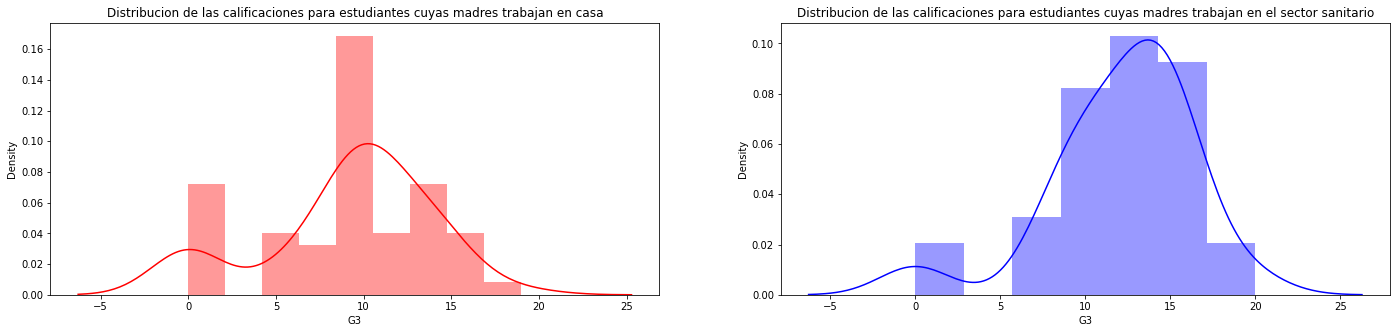

In [111]:
f= plt.figure(figsize=(24,5))
ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Mjob"] == 0]["G3"],color='red',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes cuyas madres trabajan en casa')
ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Mjob"] == 1]['G3'],color='blue',ax=ax)
ax.set_title('Distribucion de las calificaciones para estudiantes cuyas madres trabajan en el sector sanitario')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


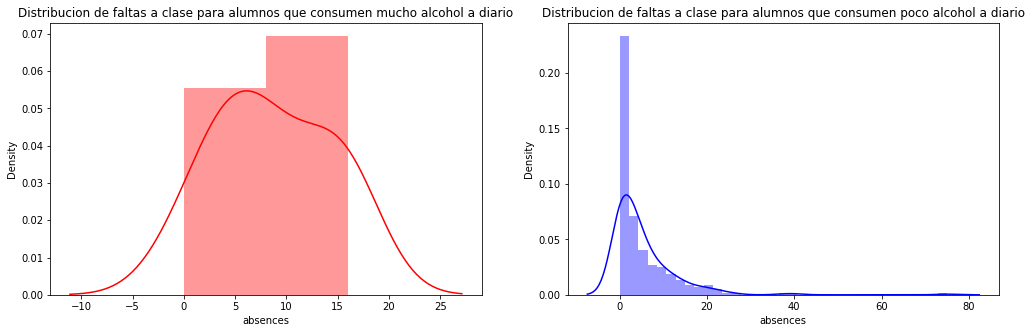

In [ ]:
f= plt.figure(figsize=(17,5))
ax=f.add_subplot(121)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 5]["absences"],color='red',ax=ax)
ax.set_title('Distribucion de faltas a clase para alumnos que consumen mucho alcohol a diario')
ax=f.add_subplot(122)
sns.distplot(dataset_mat[dataset_mat["Dalc"] == 1]['absences'],color='blue',ax=ax)
ax.set_title('Distribucion de faltas a clase para alumnos que consumen poco alcohol a diario')
plt.show()